# Comparison between French Google Ngrams 2020 and 2012

Comparing:
- number of words by years
- prefixes occurrences volumes

## Comparing corpora

In [9]:
import requests
import pandas as pd

def load_total_counts2012(corpus_id, start_year, end_year):
    '''
    This function loads the total counts for a given corpus from Google's source data.
    '''
    # map from id to url
    id_to_url= {
    15: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-totalcounts-20120701.txt',
    17: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-us-all-totalcounts-20120701.txt',
    18: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-gb-all-totalcounts-20120701.txt',
    16: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-fiction-all-totalcounts-20120701.txt',
    23: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-chi-sim-all-totalcounts-20120701.txt',
    19: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-fre-all-totalcounts-20120701.txt',
    20: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-ger-all-totalcounts-20120701.txt',
    24: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-heb-all-totalcounts-20120701.txt',
    22: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-ita-all-totalcounts-20120701.txt',
    25: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-rus-all-totalcounts-20120701.txt',
    21: 'http://storage.googleapis.com/books/ngrams/books/googlebooks-spa-all-totalcounts-20120701.txt'
    }
    hdr='Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:10.0) Gecko/20100101 Firefox/10.0'
    headers={'User-Agent':hdr}
    resp = requests.get(id_to_url[corpus_id],headers=headers)
    resp.raise_for_status()
    response = resp.text
    #print(response)
    #response = urllib2.urlopen(urllib2.Request(id_to_url[corpus_id]))
    #total_counts = []
    total_counts2 = {}
    data = response.split("\t")
    for row in data:
        #print (row)
        #continue
        # first and last rows are empty, so a try...except is needed
        try:
            year, word_count, _, _ = row.split(',')
            #print(start_year)
            #print(end_year)
            #print(year)
            if int(year) >= start_year and int(year) <= end_year:
                #print(year)
                #print(word_count)
                #total_counts.append(int(word_count))
                total_counts2[year]=int(word_count)
                #print(total_counts)
        except ValueError:
            pass
        
    return total_counts2


def load_total_counts2020(ngrams, start_year, end_year):
    '''
    This function loads the total counts for a given corpus from Google's source data.
    '''
    files = {'1': 'http://storage.googleapis.com/books/ngrams/books/20200217/fre/totalcounts-1',
            '2':'http://storage.googleapis.com/books/ngrams/books/20200217/fre/totalcounts-2',
            '3':'http://storage.googleapis.com/books/ngrams/books/20200217/fre/totalcounts-3'}
    hdr='Mozilla/5.0 (Macintosh; Intel Mac OS X x.y; rv:10.0) Gecko/20100101 Firefox/10.0'
    headers={'User-Agent':hdr}
    total_counts={}
    for nb in ngrams:
        #print(nb)
        resp = requests.get(files[nb],headers=headers)
        print(nb,files[nb], resp.raise_for_status())
        response = resp.text
        #print(response)
        counts = {}
        data = response.split("\t")
        for row in data:
            try:
                year, word_count, _, _ = row.split(',')
                #print(start_year)
                #print(end_year)
                #print(year)
                if int(year) >= start_year and int(year) <= end_year:
                    #print(year)
                    #print(word_count)
                    #total_counts.append(int(word_count))
                    counts[year]=int(word_count)
                    #print(total_counts)
            except ValueError:
                pass
        total_counts[nb]=counts
            
        
    return total_counts

1 http://storage.googleapis.com/books/ngrams/books/20200217/fre/totalcounts-1 None


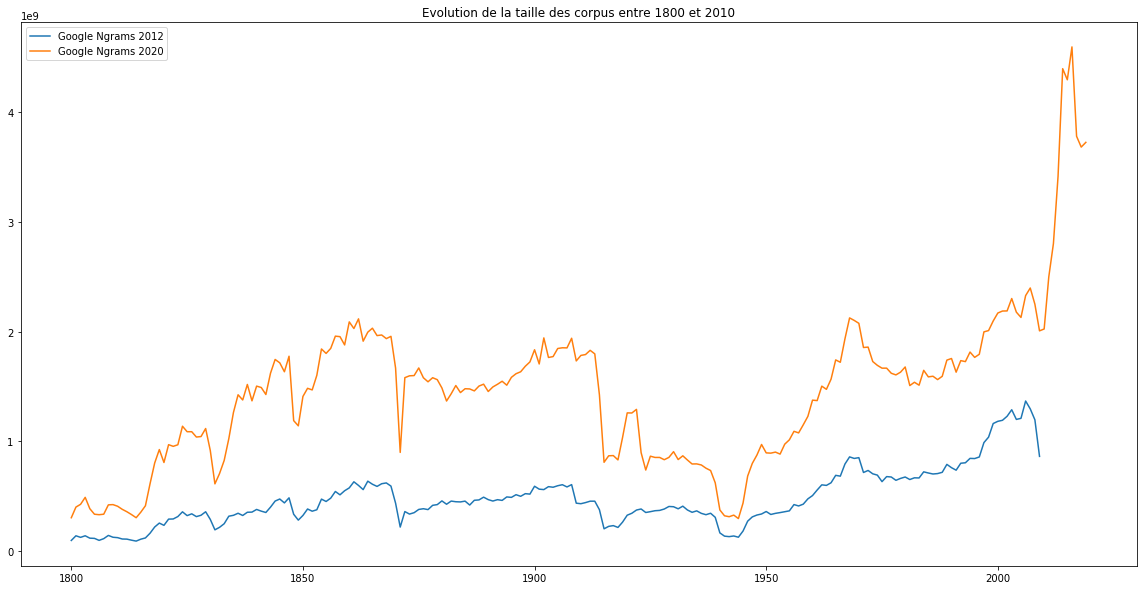

In [21]:


# load totals of tokens per corpus year
totals = load_total_counts2012(19,1800,2009)

df1 = pd.DataFrame.from_dict(totals, orient='index', columns={'Google Ngrams 2012'})
ax = df1.plot( title="Evolution de la taille des corpus entre 1800 et 2010", figsize=(20,10))

# load totals of tokens per corpus year
totals = load_total_counts2020(['1'],1800,2019)

df2 = pd.DataFrame.from_dict(totals['1'], orient='index', columns={'Google Ngrams 2020'})
df2.plot(title="Evolution de la taille des corpus entre 1800 et 2010", figsize=(20,10), ax=ax)


## Compare prefixes data

super    6778
hyper    4944
extra    4690
ultra    3353
archi    2866
méga      826
maxi      752
Name: prefix, dtype: int64
extra    1939
super    1736
hyper    1612
ultra    1146
archi     624
méga      226
maxi      187
Name: prefix, dtype: int64


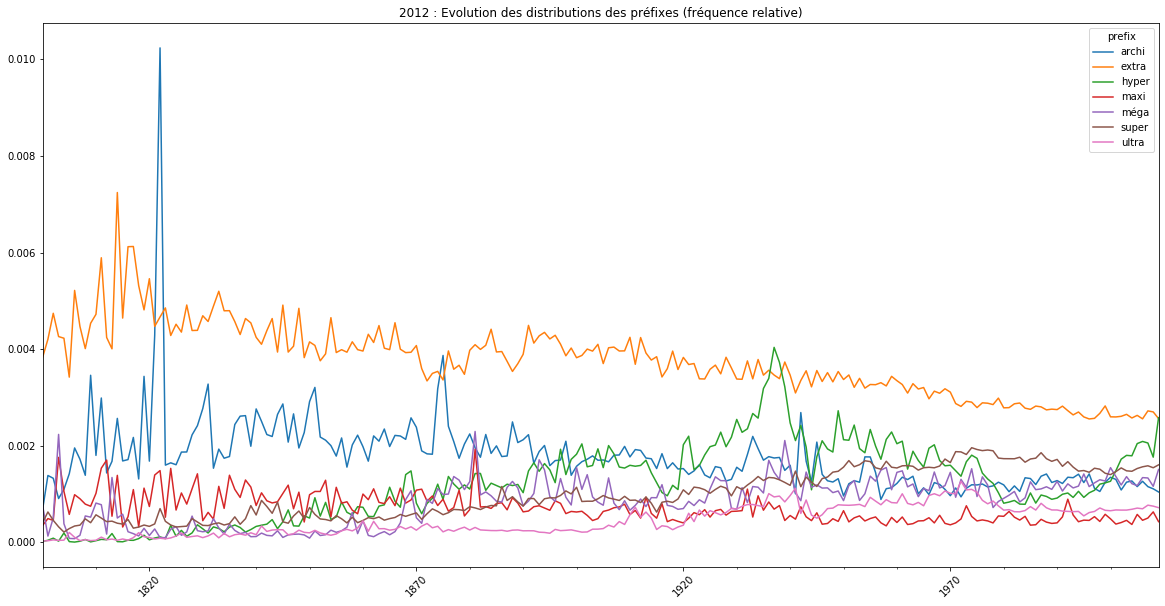

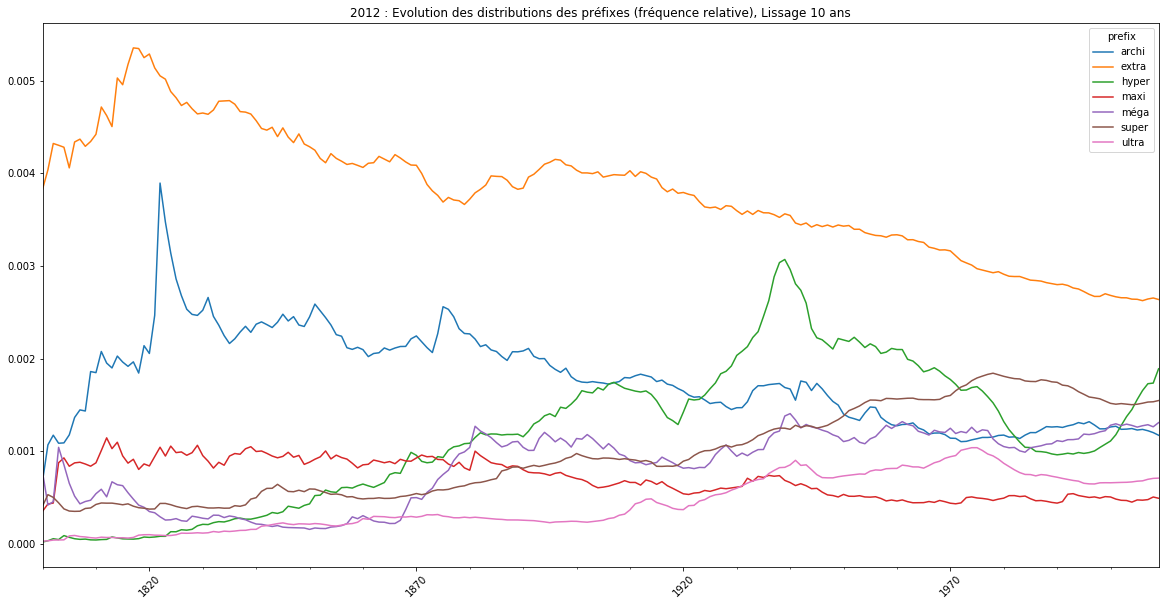

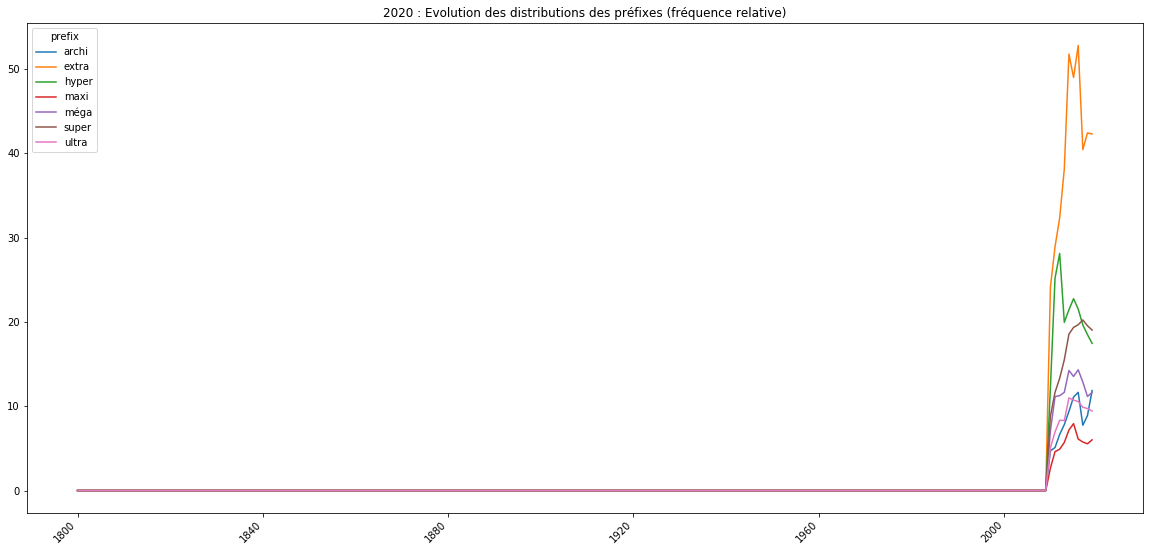

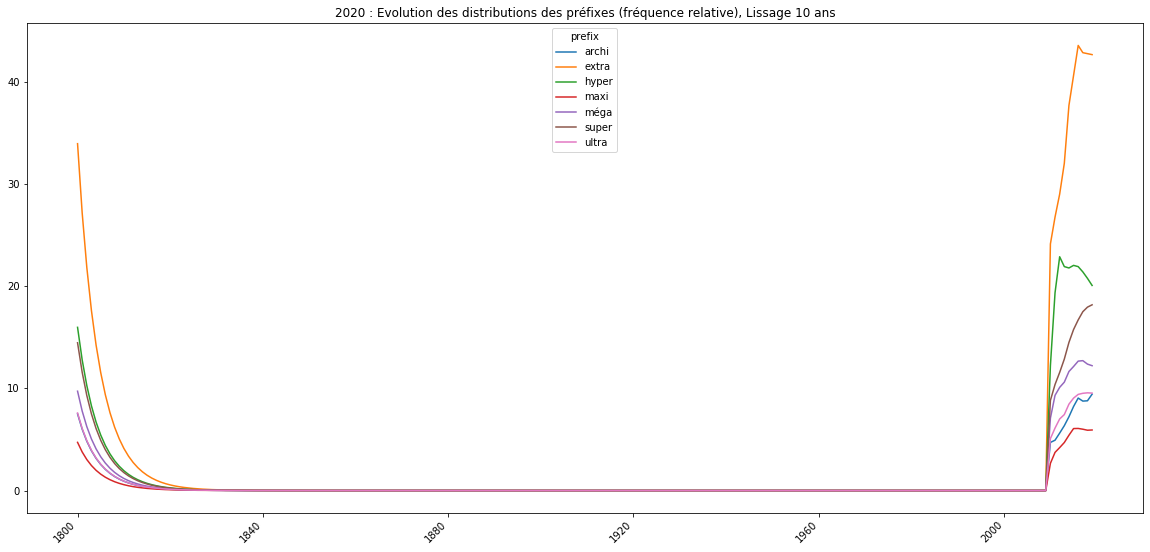

In [90]:
import re
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib
import seaborn as sns  

df2020= pd.read_csv('../data/df_googlengrams_all_freqrel.2020.csv', header=0, sep=',', error_bad_lines=False) # , index_col="string"
df2012= pd.read_csv('../data/df_googlengrams_all_freqrel.2012.csv', header=0, sep=',', error_bad_lines=False)

print(df2020.prefix.value_counts())
print(df2012.prefix.value_counts())


# df2012
df2012.drop(['Unnamed: 0','full_count','string','word','sep'], inplace=True, axis=1)
columns = df2012.columns
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]

# evolution globale pour chaque préfixe
dfplot = df2012.groupby('prefix')[periods].mean().T
dfplot.index = pd.to_datetime(dfplot.index)

fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot.plot(ax=ax,kind="line", title="2012 : Evolution des distributions des préfixes (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    

# ewm
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot.ewm(span = 10).mean().plot(ax=ax,kind="line", title="2012 : Evolution des distributions des préfixes (fréquence relative), Lissage 10 ans", rot=45, figsize=(20,10))  # [['full_count']]    


# df2020
df2020.drop(['full_count','string','word','sep'], inplace=True, axis=1)
columns = df2020.columns
periods = [elt for elt in columns if re.match("[0-9]{4}", elt)]

# evolution globale pour chaque préfixe
dfplot = df2020.groupby('prefix')[periods].mean().T
dfplot.index = pd.to_datetime(dfplot.index)

fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot.plot(ax=ax,kind="line", title="2020 : Evolution des distributions des préfixes (fréquence relative)", rot=45, figsize=(20,10))  # [['full_count']]    

# ewm
fig, ax = plt.subplots(1, figsize=(20, 15))
dfplot.ewm(span = 10).mean().plot(ax=ax,kind="line", title="2020 : Evolution des distributions des préfixes (fréquence relative), Lissage 10 ans", rot=45, figsize=(20,10))  # [['full_count']]    

